<a href="https://colab.research.google.com/github/Onethybeing/GANs/blob/main/dcgan_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow=2.12.0

ERROR: Invalid requirement: 'tensorflow=2.12.0': Expected end or semicolon (after name and no valid version specifier)
    tensorflow=2.12.0
              ^
Hint: = is not a valid operator. Did you mean == ?


In [9]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
tf.__version__

'2.19.0'

In [10]:
(x_train,y_train),(_,_) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
x_train.shape

(60000, 28, 28)

0


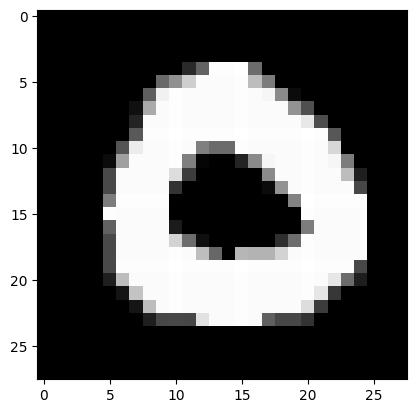

In [12]:
i = np.random.randint(0,60000)
print(y_train[i])
plt.imshow(x_train[i],cmap='gray');

In [94]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')

In [95]:
x_train.shape

(60000, 28, 28, 1)

In [96]:
x_train[0].min(), x_train[0].max()

(np.float32(-1.0), np.float32(1.0))

In [97]:
x_train = (x_train-127.5)/127.5

In [98]:
x_train[0].min(), x_train[0].max()

(np.float32(-1.0078431), np.float32(-0.99215686))

In [99]:
buffer_size=60000
batch_size = 256
buffer_size/batch_size

234.375

In [100]:
type(x_train)
x_train

array([[[[-1.0078431],
         [-1.0078431],
         [-1.0078431],
         ...,
         [-1.0078431],
         [-1.0078431],
         [-1.0078431]],

        [[-1.0078431],
         [-1.0078431],
         [-1.0078431],
         ...,
         [-1.0078431],
         [-1.0078431],
         [-1.0078431]],

        [[-1.0078431],
         [-1.0078431],
         [-1.0078431],
         ...,
         [-1.0078431],
         [-1.0078431],
         [-1.0078431]],

        ...,

        [[-1.0078431],
         [-1.0078431],
         [-1.0078431],
         ...,
         [-1.0078431],
         [-1.0078431],
         [-1.0078431]],

        [[-1.0078431],
         [-1.0078431],
         [-1.0078431],
         ...,
         [-1.0078431],
         [-1.0078431],
         [-1.0078431]],

        [[-1.0078431],
         [-1.0078431],
         [-1.0078431],
         ...,
         [-1.0078431],
         [-1.0078431],
         [-1.0078431]]],


       [[[-1.0078431],
         [-1.0078431],
         [-1.0

###generator in keras

In [123]:
def build_generator():
  network =tf.keras.Sequential()

  network.add(layers.Dense(units = 7*7*256,use_bias = False,input_shape=(100,)))
  network.add(layers.BatchNormalization())
  netzwork.add(layers.LeakyReLU())
  network.add(layers.Reshape((7,7,256)))



  # 7*7*128
  network.add(layers.Conv2DTranspose(filters=128,kernel_size=(5,5),padding ='same',strides=(2,2,),use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14*14*64
  network.add(layers.Conv2DTranspose(filters=64,kernel_size=(5,5),padding='same',strides=(2,2),use_bias =False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28*28*1
  network.add(layers.Conv2DTranspose(filters=1,kernel_size=(5,5),padding='same',strides=(1,1),use_bias= True,activation='tanh'))

  network.summary()
  return network

In [124]:
generator = build_generator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'netzwork' is not defined

In [125]:
generator.input

AttributeError: The layer sequential_5 has never been called and thus has no defined input.

In [126]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-5.69780111e-01, -3.22106647e+00,  1.11990178e+00,
         9.10171643e-02,  5.47012165e-02, -8.32422972e-01,
         4.92143370e-02, -7.69147277e-01, -1.38437599e-01,
         1.13777518e+00, -7.35175550e-01, -3.80674362e-01,
        -1.09073389e+00,  1.87353030e-01,  2.10662818e+00,
         2.06517076e+00, -2.61153722e+00, -1.65899265e+00,
         9.03663278e-01,  1.42104697e+00, -2.16615939e+00,
        -1.80359364e+00,  1.57032892e-01,  1.29362547e+00,
         7.44242013e-01,  3.75813425e-01, -5.89417279e-01,
         4.49187815e-01,  9.08974230e-01, -9.21969950e-01,
        -9.71768737e-01,  1.61837971e+00,  7.44243085e-01,
        -1.03578019e+00,  7.17069745e-01, -1.64667022e+00,
        -4.27060902e-01,  1.65520048e+00, -1.94021046e-01,
        -4.44513053e-01,  1.49804986e+00, -9.26449239e-01,
         7.30253339e-01, -7.48979032e-01,  6.79080307e-01,
        -4.42441314e-01,  1.52489424e-01,  3.76055092e-01,
      

In [127]:
generated_image = generator(noise,training= False)
generated_image.shape

TensorShape([1, 28, 28, 1])

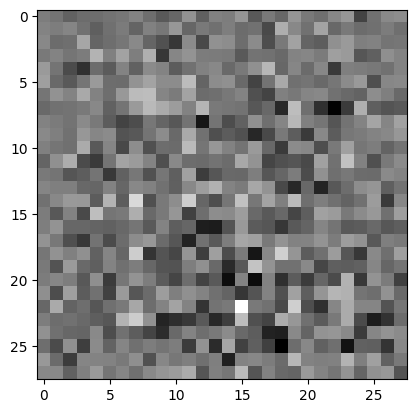

In [128]:
plt.imshow(generated_image[0,:,:,0],cmap='gray');

###build the discriminator

In [129]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14*14*64
  network.add(layers.Conv2D(filters=64,strides=(2,2),kernel_size=(5,5),padding='same',input_shape =[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7*7*128
  network.add(layers.Conv2D(filters=128,strides=(2,2),kernel_size=(5,5),padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()
  return network

In [130]:
discriminator = build_discriminator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
discriminator(generated_image, training = False) # logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00016705]], dtype=float32)>

In [132]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

error calculation

In [133]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [134]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [135]:
def discriminator_loss(expected_ouput,fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_ouput),expected_ouput)
  fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
  total_loss = fake_loss+real_loss
  return total_loss

In [136]:
def generator_loss(fake_ouput):
  return cross_entropy(tf.ones_like(fake_ouput),fake_ouput)

In [137]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [138]:
x_train
epochs = 100
noise_dimension =100
number_of_images =16

In [139]:
batch_size,noise_dimension

(256, 100)

In [140]:
@tf.function
def train(images):
  noise = tf.random.normal([batch_size,noise_dimension])
  #print(noise.shape)
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise,training= True)

    expected_output = discriminator(images,training =True)
    fake_output = discriminator(generated_images,training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output,fake_output)

  generator_gradients = gen_tape.gradient(gen_loss,generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,discriminator.trainable_variables)) # Corrected line

In [141]:
tf.config.run_functions_eagerly(True)
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

def train_epochs(dataset,epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)

In [142]:
test_images = tf.random.normal([number_of_images,noise_dimension])
test_images.shape

TensorShape([16, 100])

In [143]:
def train_gan(dataset,epochs,test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)
    print('Epochs',epoch+1)
    generated_images = generator(test_images,training= False)
    fig = plt.figure(figsize = (10 ,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[1,:,:,0]*127.5+127.5,cmap='gray')
      plt.axis('off')
    plt.show()

In [144]:
train_gan(x_train, epochs, test_images)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 6272, but received input with shape (28, 896)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28, 1), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>